# Links used
<br>https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
<br>https://www.datacamp.com/tutorial/discovering-hidden-topics-python
# Link to understand GMM
<br>https://www.kaggle.com/code/vipulgandhi/gaussian-mixture-models-clustering-explained

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
pd.set_option('display.max_columns', 130)
pd.set_option('display.max_colwidth', None)
df = pd.read_csv('fields_full2.csv')

## MetaData Analysis

Handle - ID of Wine, but may not be full name of Wine 
<br>Title - Name of Wine, If its NaN it might be duplicate cause of multiple selection
<br>Body(HTML) - Description Section on the website not all field has body
<br>Vendor - Name of seller
<br>Product Category After the last ">" then is the item itself
<br>Type - Detail type of item like an extension of product category 
<br>Tags - Extra Remarks/ Vendor?
<br>SEO Description - Some Description for different products might be the same
<br>Three Status;active,archived, draft only active can be found on the website
<br>To Note: BoundByWine Vendor Dont have Body HTML and SEO description


In [2]:
df.columns

Index(['Unnamed: 0', 'title', 'body_html', 'vendor', 'product_type',
       'created_at', 'handle', 'updated_at', 'published_at', 'template_suffix',
       ...
       'my_fields.tannin', 'my_fields.tree_fruit', 'my_fields.tropical_fruit',
       'my_fields.yeasty', 'my_fields.herbs', 'my_fields.herbasceous',
       'my_fields.floral', 'my_fields.dried_fruit', 'my_fields.citrus',
       'my_fields.black_fruit'],
      dtype='object', length=130)

In [3]:
df = df.select_dtypes(exclude=['bool','int64'])
rem = ['global.acidity','my_fields.acidity','variants_price']
id_col = [x for x in list(df.columns) if any(re.findall(r'_id|id.|html|_at|variants_|image|facebook|ba_rev.review_data|template_suffix|published_scope|spr.reviews|handle|global.title_tag', x)) or 'id' == x]
for i in rem:
    id_col.remove(i)

df = df.drop(id_col, axis=1)

In [4]:
list(df.columns).sort()
list(df.columns)

['title',
 'vendor',
 'product_type',
 'status',
 'tags',
 'variants_price',
 'options_name',
 'options_values',
 'global.acidity',
 'global.awards',
 'global.black_fruit',
 'global.body',
 'global.citrus',
 'global.country',
 'global.dried_fruit',
 'global.dryness',
 'global.earthy',
 'global.fermentation',
 'global.floral',
 'global.food_pairing',
 'global.glass',
 'global.grape',
 'global.herbasceous',
 'global.herbs',
 'global.maker',
 'global.mineral',
 'global.oak',
 'global.one_liner_description',
 'global.red_fruit',
 'global.region',
 'global.serving_temperature',
 'global.spices',
 'global.stone_fruit',
 'global.sustainability',
 'global.tannin',
 'global.tree_fruit',
 'global.tropical_fruit',
 'global.western_food_pairing',
 'global.yeasty',
 'global.description_tag',
 'my_fields.decant',
 'my_fields.country',
 'my_fields.body',
 'my_fields.awards',
 'my_fields.alcohol_',
 'my_fields.acidity',
 'my_fields.maker',
 'my_fields.mineral',
 'my_fields.oak',
 'my_fields.red_fruit'

# Preprocessing

In [5]:
df.shape

(1763, 65)

In [6]:
df = df[df['status'].str.contains('active',na =False)]

In [7]:
#Only Columns to be selected
useful_col = list(df.columns)
useful_col.remove('status')
new_df = df[useful_col]

In [8]:
new_df.shape

(1335, 64)

In [9]:
scrape_df = pd.read_csv('boundbywine_data/boundbywine_content.csv')
mod_df = scrape_df[['name','html_characteristics','description']]
mod_df.rename(columns = {"name":"title"},inplace = True)
df_cd = pd.merge(new_df, mod_df, on = 'title',how = 'left')
print(df_cd.shape)
df_cd.head()

(1335, 66)


C:\Users\tanwe\AppData\Local\Temp\ipykernel_23508\4170713735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_df.rename(columns = {"name":"title"},inplace = True)


title             vendor  product_type  \
0                Vinas Mora Barbba 2020         Vinas Mora   Orange Wine   
1                     Oxer Tartalo 2019         Oxer Wines      Red Wine   
2                    Oxer Terlegiz 2021         Oxer Wines    White Wine   
3                    Oxer Kalamity 2017         Oxer Wines      Red Wine   
4  Lakeview Cabernet Franc Icewine 2017  Lakeview Wine Co.  Dessert Wine   

              tags  variants_price options_name     options_values  \
0  Adriatic Pantry            69.0        Title  ['Default Title']   
1          Botella           268.0        Title  ['Default Title']   
2          Botella           106.0        Title  ['Default Title']   
3          Botella           232.0        Title  ['Default Title']   
4   Heavenly Vines            52.0        Title  ['Default Title']   

  global.acidity global.awards global.black_fruit global.body global.citrus  \
0            NaN           NaN                NaN         NaN           NaN   
1            NaN           NaN                NaN         NaN           NaN   
2            NaN           NaN                NaN         NaN           NaN   
3            NaN           NaN                NaN         NaN           NaN   
4            NaN           NaN                NaN         NaN           NaN   

  global.country global.dried_fruit global.dryness global.earthy  \
0            NaN                NaN            NaN           NaN   
1            NaN                NaN            NaN           NaN   
2            NaN                NaN            NaN           NaN   
3            NaN                NaN            NaN           NaN   
4            NaN                NaN            NaN           NaN   

  global.fermentation global.floral global.food_pairing global.glass  \
0                 NaN           NaN                 NaN          NaN   
1                 NaN           NaN                 NaN          NaN   
2                 NaN           NaN                 NaN          NaN   
3                 NaN           NaN                 NaN          NaN   
4                 NaN           NaN                 NaN          NaN   

  global.grape global.herbasceous global.herbs global.maker global.mineral  \
0          NaN                NaN          NaN          NaN            NaN   
1          NaN                NaN          NaN          NaN            NaN   
2          NaN                NaN          NaN          NaN            NaN   
3          NaN                NaN          NaN          NaN            NaN   
4          NaN                NaN          NaN          NaN            NaN   

  global.oak global.one_liner_description global.red_fruit global.region  \
0        NaN                          NaN              NaN           NaN   
1        NaN                          NaN              NaN           NaN   
2        NaN                          NaN              NaN           NaN   
3        NaN                          NaN              NaN           NaN   
4        NaN                          NaN              NaN           NaN   

  global.serving_temperature global.spices global.stone_fruit  \
0                        NaN           NaN                NaN   
1                        NaN           NaN                NaN   
2                        NaN           NaN                NaN   
3                        NaN           NaN                NaN   
4                        NaN           NaN                NaN   

  global.sustainability global.tannin global.tree_fruit global.tropical_fruit  \
0                   NaN           NaN               NaN                   NaN   
1                   NaN           NaN               NaN                   NaN   
2                   NaN           NaN               NaN                   NaN   
3                   NaN           NaN               NaN                   NaN   
4                   NaN           NaN               NaN                   NaN   

  global.western_food_pairing globa

In [10]:
df_cd.shape

(1335, 66)

In [11]:

import re
CLEANR = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
def cleanhtml(raw_html):
    cleantext = re.sub(CLEANR, ' ', raw_html)
    cleantext = cleantext + ':'
    return cleantext
def range_overlapping(x, y):
    if x.start == x.stop or y.start == y.stop:
        return False
    return x.start <= y.stop and y.start <= x.stop

def extract (test_txt):
    if pd.isna(test_txt):
        return ''
    strong = test_txt.split('<strong>')
    clean = [cleanhtml(x).split(':')[1].strip() for x in strong if '</strong>' in x and ':' in x]
    remove = ['Wine Structure','Origin   Awards','Serving Recommendations','https']
    #https://winefolly.com/tips/white-red-wine-temperature/
    cold = [(0,7,'Ice Cold'),(7,12,'Fridge Cold'),(12,15,'Cool'),(15,25,'Slightly Cool')]
    temp = []
    
    for x in clean:
        if x != '' and x not in remove:
            # For taste with plus and minus symbol

            if ' \n' in x:
                # If Alcohol percentage present
                if 'Origin' in x:
                    x = x.split(' \n')[0].strip() + 'Percent'
                # Awards 
                elif 'Serving' in x:
                    x = x.split(' \n')[0].strip()
                    if '90'in x:
                        x = 'Outstanding'
                    elif '95' in x:
                        x = 'Classic'
                #Wine structure
                if 'Wine' in x:
                    x = x.split(' \n')[0]
            #Temperature
            if 'degree' in x:
#                 print(x)
                if ' - ' in x:
                    te = x.split(' ')[-4:]
                    s = int(te[0])
                    e = int(te[2])
                elif ' -' in x:
                    te = x.split(' ')
                    s = int(te[-3])
                    e = int(te[-2][1:])
                elif ' d' not in x:
                    x = x.split('d')[-2].split(' ')[-1]
                    te = x.split('-')
                    s = int(te[0])
                    e = int(te[1])
                elif '–' in x or '-' in x or '—'in x:
                    if '–' in x:
                        x = x.replace('–','-')
                    elif '—' in x:
                        x = x.replace('—','-')
                    if 'or' in x and 'room' in x:
                        
                        te = x.split(' ')[3]
                        te = te.split('-')

                    else:
                        te = x.split(' ')[-2]
                        te = te.split('-')
                    s = int(te[0])
                    e = int(te[1])
                elif 'enjoy' in x.lower() or 'served' in x.lower():
                    
                    s = int(x.split(' ')[-2])
                    e = s

                r1 = range(s,e)
                for c in cold:
                    check = range(c[0],c[1])
                    if range_overlapping(r1,check):
                        x = c[2]
                        break
            elif '+' in x:
                x = x.replace('+','Plus')
            elif '-' in x:
                x = x.replace('-','Minus')
            elif 'hour' in x:
                x = x.split(' ')[-2]+'h'  
            temp.append(x)
    return ' '.join(temp)

df_cd['html_extra'] = df_cd['html_characteristics'].apply(lambda r:extract(r))
df_cd['html_extra'].head()

0                                                                                                               Cherry         Salt Chocolate Forest floor Medium Dry Medium Medium 13.5Percent Dalmatia, Croatia Vinas Mora Blend Vegan Slight Wood 30 minutes Best served between 16–18°C Hoisin baby back ribs, KBBQ, black pepper beef stir fry Burgers, veggie kebabs
1                                                                                         Cherry, Plum, Bramble  Thyme  Clove      Chalk Leather Full Dry Medium Medium Plus 14.5Percent Rioja Alavesa, Basque Country Oxer Wines Tempranillo Heavy Wood Outstanding 1h Best served between 16–18°C KBBQ, Siu Yuk, Wagyu steak Grilled steak, game stew, roast leg of lamb
2    Apple, Quince   Lemon, Grapefruit  Saline, Limestone, Salty Umami Medium Plus Dry High Medium Minus 13Percent Rioja Alavesa, Basque Country Oxer Wines Petit Courbu Slight Wood No Best served between 8–10°C Crispy Vietnamese pork pancakes, oyster omelette, Japanese styl

In [12]:
new_df = df_cd

In [13]:
new_df = new_df.drop(new_df[new_df['title'].isna()].index)

In [14]:
new_df = new_df.fillna('')

In [15]:
new_df.shape

(1335, 67)

In [16]:
new_df.head()

title             vendor  product_type  \
0                Vinas Mora Barbba 2020         Vinas Mora   Orange Wine   
1                     Oxer Tartalo 2019         Oxer Wines      Red Wine   
2                    Oxer Terlegiz 2021         Oxer Wines    White Wine   
3                    Oxer Kalamity 2017         Oxer Wines      Red Wine   
4  Lakeview Cabernet Franc Icewine 2017  Lakeview Wine Co.  Dessert Wine   

              tags  variants_price options_name     options_values  \
0  Adriatic Pantry            69.0        Title  ['Default Title']   
1          Botella           268.0        Title  ['Default Title']   
2          Botella           106.0        Title  ['Default Title']   
3          Botella           232.0        Title  ['Default Title']   
4   Heavenly Vines            52.0        Title  ['Default Title']   

  global.acidity global.awards global.black_fruit global.body global.citrus  \
0                                                                             
1                                                                             
2                                                                             
3                                                                             
4                                                                             

  global.country global.dried_fruit global.dryness global.earthy  \
0                                                                  
1                                                                  
2                                                                  
3                                                                  
4                                                                  

  global.fermentation global.floral global.food_pairing global.glass  \
0                                                                      
1                                                                      
2                                                                      
3                                                                      
4                                                                      

  global.grape global.herbasceous global.herbs global.maker global.mineral  \
0                                                                            
1                                                                            
2                                                                            
3                                                                            
4                                                                            

  global.oak global.one_liner_description global.red_fruit global.region  \
0                                                                          
1                                                                          
2                                                                          
3                                                                          
4                                                                          

  global.serving_temperature global.spices global.stone_fruit  \
0                                                               
1                                                               
2                                                               
3                                                               
4                                                               

  global.sustainability global.tannin global.tree_fruit global.tropical_fruit  \
0                                                                               
1                                                                               
2                                                                               
3                                                                               
4                                                                               

  global.western_food_pairing globa

In [17]:
useful_col.extend(list(mod_df.columns))

In [18]:
useful_col.remove('html_characteristics')
useful_col.append('description')
# useful_col.pop(-1)
useful_col.append('html_extra')

In [19]:
new_df.head()

title             vendor  product_type  \
0                Vinas Mora Barbba 2020         Vinas Mora   Orange Wine   
1                     Oxer Tartalo 2019         Oxer Wines      Red Wine   
2                    Oxer Terlegiz 2021         Oxer Wines    White Wine   
3                    Oxer Kalamity 2017         Oxer Wines      Red Wine   
4  Lakeview Cabernet Franc Icewine 2017  Lakeview Wine Co.  Dessert Wine   

              tags  variants_price options_name     options_values  \
0  Adriatic Pantry            69.0        Title  ['Default Title']   
1          Botella           268.0        Title  ['Default Title']   
2          Botella           106.0        Title  ['Default Title']   
3          Botella           232.0        Title  ['Default Title']   
4   Heavenly Vines            52.0        Title  ['Default Title']   

  global.acidity global.awards global.black_fruit global.body global.citrus  \
0                                                                             
1                                                                             
2                                                                             
3                                                                             
4                                                                             

  global.country global.dried_fruit global.dryness global.earthy  \
0                                                                  
1                                                                  
2                                                                  
3                                                                  
4                                                                  

  global.fermentation global.floral global.food_pairing global.glass  \
0                                                                      
1                                                                      
2                                                                      
3                                                                      
4                                                                      

  global.grape global.herbasceous global.herbs global.maker global.mineral  \
0                                                                            
1                                                                            
2                                                                            
3                                                                            
4                                                                            

  global.oak global.one_liner_description global.red_fruit global.region  \
0                                                                          
1                                                                          
2                                                                          
3                                                                          
4                                                                          

  global.serving_temperature global.spices global.stone_fruit  \
0                                                               
1                                                               
2                                                               
3                                                               
4                                                               

  global.sustainability global.tannin global.tree_fruit global.tropical_fruit  \
0                                                                               
1                                                                               
2                                                                               
3                                                                               
4                                                                               

  global.western_food_pairing globa

In [20]:
useful_col = list(set(useful_col))
useful_col.sort()
useful_col

['description',
 'global.acidity',
 'global.awards',
 'global.black_fruit',
 'global.body',
 'global.citrus',
 'global.country',
 'global.description_tag',
 'global.dried_fruit',
 'global.dryness',
 'global.earthy',
 'global.fermentation',
 'global.floral',
 'global.food_pairing',
 'global.glass',
 'global.grape',
 'global.herbasceous',
 'global.herbs',
 'global.maker',
 'global.mineral',
 'global.oak',
 'global.one_liner_description',
 'global.red_fruit',
 'global.region',
 'global.serving_temperature',
 'global.spices',
 'global.stone_fruit',
 'global.sustainability',
 'global.tannin',
 'global.tree_fruit',
 'global.tropical_fruit',
 'global.western_food_pairing',
 'global.yeasty',
 'html_extra',
 'my_fields.acidity',
 'my_fields.alcohol_',
 'my_fields.awards',
 'my_fields.black_fruit',
 'my_fields.body',
 'my_fields.citrus',
 'my_fields.country',
 'my_fields.decant',
 'my_fields.dried_fruit',
 'my_fields.floral',
 'my_fields.herbasceous',
 'my_fields.herbs',
 'my_fields.maker',
 'my

In [21]:
product_cat = list(df['product_type'].unique())
print(product_cat)
product_cat = [x for x in product_cat if isinstance(x,str)]
f_product_cat = [x for x in product_cat if any(re.findall(r'Wine|Cider|Gin|Liqueur|Sake|Vodka|Tequila|Liquor|Whiskey|Rum', x))]
f_product_cat.remove('Wine Aerators')
f_product_cat.remove('Wine Subscription')
f_product_cat

['Orange Wine', 'Red Wine', 'White Wine', 'Dessert Wine', 'Candy & Chocolate', 'Sparkling Wine', 'Fortified Wine', nan, 'Event Tickets', 'Cider', 'Rose Wine', 'Gift & Hamper', 'Beverages', 'Hard Cider', 'No Alcohol Wine', 'Soda', 'Gin', 'Dips & Spreads', 'Liqueur', 'Sake', 'Snack Foods', 'Water', 'Cheese', 'Chips', 'Syrup', 'Stemware', 'Vodka', 'Tequila', 'Coffee', 'Juice', 'Cocktail Mixes', 'Milk', 'Pasta & Noodles', 'Wine Subscription', 'Liqueurs', 'Decanters', 'Liquor & Spirits', 'Wine', 'Quince', 'Whiskey', 'Rum', 'Subscription', 'Bottle Stoppers & Savers', 'Wine Aerators']


['Orange Wine',
 'Red Wine',
 'White Wine',
 'Dessert Wine',
 'Sparkling Wine',
 'Fortified Wine',
 'Cider',
 'Rose Wine',
 'Hard Cider',
 'No Alcohol Wine',
 'Gin',
 'Liqueur',
 'Sake',
 'Vodka',
 'Tequila',
 'Liqueurs',
 'Liquor & Spirits',
 'Wine',
 'Whiskey',
 'Rum']

In [22]:
s_str = "|".join(f_product_cat)

In [23]:
new_df.shape

(1335, 67)

In [24]:
new_df = new_df[new_df['product_type'].str.contains(s_str,na = False)]

In [25]:
new_df.shape

(1191, 67)

In [26]:
useful_col

['description',
 'global.acidity',
 'global.awards',
 'global.black_fruit',
 'global.body',
 'global.citrus',
 'global.country',
 'global.description_tag',
 'global.dried_fruit',
 'global.dryness',
 'global.earthy',
 'global.fermentation',
 'global.floral',
 'global.food_pairing',
 'global.glass',
 'global.grape',
 'global.herbasceous',
 'global.herbs',
 'global.maker',
 'global.mineral',
 'global.oak',
 'global.one_liner_description',
 'global.red_fruit',
 'global.region',
 'global.serving_temperature',
 'global.spices',
 'global.stone_fruit',
 'global.sustainability',
 'global.tannin',
 'global.tree_fruit',
 'global.tropical_fruit',
 'global.western_food_pairing',
 'global.yeasty',
 'html_extra',
 'my_fields.acidity',
 'my_fields.alcohol_',
 'my_fields.awards',
 'my_fields.black_fruit',
 'my_fields.body',
 'my_fields.citrus',
 'my_fields.country',
 'my_fields.decant',
 'my_fields.dried_fruit',
 'my_fields.floral',
 'my_fields.herbasceous',
 'my_fields.herbs',
 'my_fields.maker',
 'my

In [27]:
#Using web scrape data if commented 
#Uncomment to not use web scrape data
# useful_col.remove('description')
# useful_col.remove('html_extra')

In [28]:
useful_col

['description',
 'global.acidity',
 'global.awards',
 'global.black_fruit',
 'global.body',
 'global.citrus',
 'global.country',
 'global.description_tag',
 'global.dried_fruit',
 'global.dryness',
 'global.earthy',
 'global.fermentation',
 'global.floral',
 'global.food_pairing',
 'global.glass',
 'global.grape',
 'global.herbasceous',
 'global.herbs',
 'global.maker',
 'global.mineral',
 'global.oak',
 'global.one_liner_description',
 'global.red_fruit',
 'global.region',
 'global.serving_temperature',
 'global.spices',
 'global.stone_fruit',
 'global.sustainability',
 'global.tannin',
 'global.tree_fruit',
 'global.tropical_fruit',
 'global.western_food_pairing',
 'global.yeasty',
 'html_extra',
 'my_fields.acidity',
 'my_fields.alcohol_',
 'my_fields.awards',
 'my_fields.black_fruit',
 'my_fields.body',
 'my_fields.citrus',
 'my_fields.country',
 'my_fields.decant',
 'my_fields.dried_fruit',
 'my_fields.floral',
 'my_fields.herbasceous',
 'my_fields.herbs',
 'my_fields.maker',
 'my

In [29]:
#Joining all text tgt
new_df['combined'] = new_df[useful_col].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [30]:
#Remove extra spaces
def remove_trailing(r):
    r = r.split()
    return ' '.join([x.strip() for x in r])

In [31]:
#Remove all non-words keeping alphanumeric
# re.sub(r'[^A-Za-z0-9 ]+', '', a)
# new_df['combined'] = new_df['combined'].str.replace('\W', ' ', regex=True)
new_df['combined'] = new_df['combined'].str.replace(r'[^A-Za-z0-9 ]+', ' ', regex=True)
new_df['combined'] = new_df['combined'].str.lower()
new_df['combined'] = new_df['combined'].apply(lambda r: remove_trailing(r))

In [32]:
clean_df = new_df['combined']

In [33]:
clean_df.head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     vinas mora barbba 2020 vinas mora barbba is bursting with juicy marasca cherries hints of chocolate and earthiness soon follow in this structured wine before closing in a beautiful salty finish a blend of red varieties babi pl

In [34]:
new_df.columns

Index(['title', 'vendor', 'product_type', 'tags', 'variants_price',
       'options_name', 'options_values', 'global.acidity', 'global.awards',
       'global.black_fruit', 'global.body', 'global.citrus', 'global.country',
       'global.dried_fruit', 'global.dryness', 'global.earthy',
       'global.fermentation', 'global.floral', 'global.food_pairing',
       'global.glass', 'global.grape', 'global.herbasceous', 'global.herbs',
       'global.maker', 'global.mineral', 'global.oak',
       'global.one_liner_description', 'global.red_fruit', 'global.region',
       'global.serving_temperature', 'global.spices', 'global.stone_fruit',
       'global.sustainability', 'global.tannin', 'global.tree_fruit',
       'global.tropical_fruit', 'global.western_food_pairing', 'global.yeasty',
       'global.description_tag', 'my_fields.decant', 'my_fields.country',
       'my_fields.body', 'my_fields.awards', 'my_fields.alcohol_',
       'my_fields.acidity', 'my_fields.maker', 'my_fields.mineral',


# Model Building

In [35]:
#Tfidf
from sklearn import mixture
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(clean_df)

In [36]:
X

<1191x15077 sparse matrix of type '<class 'numpy.float64'>'
	with 178834 stored elements in Compressed Sparse Row format>

<b><br>SVD decompose a matrix into several component matrices, exposing the properties of the original matrix
<b><br>Find the optimal set of factors that best predict the outcome
<b><br>Basically I used it to transform my sparse matrix into a 2 component array




reduces the overall dimensionality of the input matrix (number of input documents by number of extracted terms) to a lower dimensional space (a matrix of much smaller size with fewer variables), where each consecutive dimension represents the largest degree of variability (between terms and documents) possible (Manning and Schutze, 1999). Ideally, the analyst might identify the two or three most salient dimensions that account for most of the variability (differences) between the terms and documents, thus identifying the latent semantic space (is this term the same as lower dimensional space?) that organizes the terms and documents in the analysis. When these dimensions are identified, they represent the underlying “meaning” of what is contained (discussed or described) in the documents. For example, assume that matrix A represents an m × n term occurrence matrix, where m is the number of input documents and n is the number of terms selected for analysis. The SVD computes the m × r orthogonal matrix U, n × r orthogonal matrix V, and r × r matrix D, so A = UDV’ and r is the number of eigenvalues of A’A.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Singular_value_decomposition_visualisation.svg/330px-Singular_value_decomposition_visualisation.svg.png" alt="Alternative text" />

https://gregorygundersen.com/blog/2018/12/10/svd/
<br>https://storrs.io/svd/

In [37]:
#Did SVD to adapt the spare matrix to contain 2 components
import numpy as np
from sklearn.decomposition import TruncatedSVD
truncatedSVD=TruncatedSVD(2)
X_truncated = truncatedSVD.fit_transform(X)
X_truncated[:10]

array([[ 1.22039935e-01, -4.14352040e-02],
       [ 1.81896101e-01, -8.67127144e-02],
       [ 1.42982268e-01,  5.46803262e-02],
       [ 2.00421580e-01, -9.35453894e-02],
       [ 8.04123137e-02, -3.22379903e-02],
       [ 5.72021197e-02, -1.22019329e-04],
       [ 7.52811754e-02,  2.56435541e-02],
       [ 1.95959507e-01, -1.09776194e-01],
       [ 2.49731605e-01, -6.74109703e-02],
       [ 2.73637322e-01,  1.41693276e-01]])

C:\Users\tanwe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


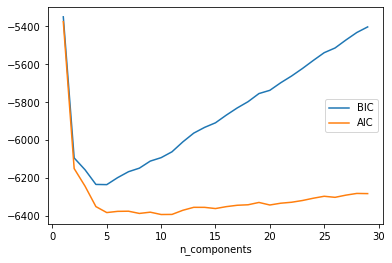

In [38]:
# View number of clusters
n_components = np.arange(1, 30)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(X_truncated)
          for n in n_components]

plt.plot(n_components, [m.bic(X_truncated) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_truncated) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

<b>Gmm assumes gaussian distribution which is the same as normal distribution

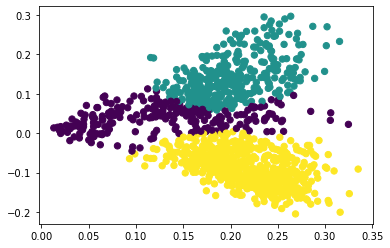

In [39]:
gmm = mixture.GaussianMixture(n_components=3, random_state=0).fit(X_truncated)
labels = gmm.predict(X_truncated)
plt.scatter(X_truncated[:, 0], X_truncated[:, 1], c=labels, s=40, cmap='viridis');

In [40]:
#Giving probability of it belonging to other clusters
probs = gmm.predict_proba(X_truncated)
print(probs[:5].round(3))

[[0.226 0.056 0.719]
 [0.    0.    0.999]
 [0.648 0.343 0.009]
 [0.    0.    1.   ]
 [0.875 0.039 0.087]]


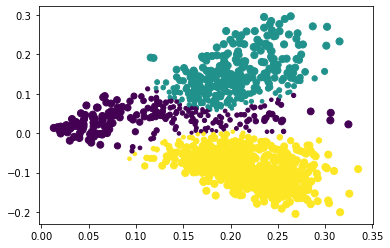

In [41]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X_truncated[:, 0], X_truncated[:, 1], c=labels, cmap='viridis', s=size);

In [42]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

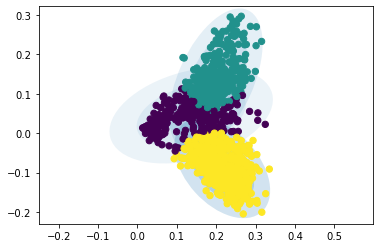

In [43]:
#See the gmm prediction
plot_gmm(gmm, X_truncated)

# Predict

In [44]:
predict_df = new_df.copy()
predict_df['Label'] = labels
predict_df.head()

title             vendor  product_type  \
0                Vinas Mora Barbba 2020         Vinas Mora   Orange Wine   
1                     Oxer Tartalo 2019         Oxer Wines      Red Wine   
2                    Oxer Terlegiz 2021         Oxer Wines    White Wine   
3                    Oxer Kalamity 2017         Oxer Wines      Red Wine   
4  Lakeview Cabernet Franc Icewine 2017  Lakeview Wine Co.  Dessert Wine   

              tags  variants_price options_name     options_values  \
0  Adriatic Pantry            69.0        Title  ['Default Title']   
1          Botella           268.0        Title  ['Default Title']   
2          Botella           106.0        Title  ['Default Title']   
3          Botella           232.0        Title  ['Default Title']   
4   Heavenly Vines            52.0        Title  ['Default Title']   

  global.acidity global.awards global.black_fruit global.body global.citrus  \
0                                                                             
1                                                                             
2                                                                             
3                                                                             
4                                                                             

  global.country global.dried_fruit global.dryness global.earthy  \
0                                                                  
1                                                                  
2                                                                  
3                                                                  
4                                                                  

  global.fermentation global.floral global.food_pairing global.glass  \
0                                                                      
1                                                                      
2                                                                      
3                                                                      
4                                                                      

  global.grape global.herbasceous global.herbs global.maker global.mineral  \
0                                                                            
1                                                                            
2                                                                            
3                                                                            
4                                                                            

  global.oak global.one_liner_description global.red_fruit global.region  \
0                                                                          
1                                                                          
2                                                                          
3                                                                          
4                                                                          

  global.serving_temperature global.spices global.stone_fruit  \
0                                                               
1                                                               
2                                                               
3                                                               
4                                                               

  global.sustainability global.tannin global.tree_fruit global.tropical_fruit  \
0                                                                               
1                                                                               
2                                                                               
3                                                                               
4                                                                               

  global.western_food_pairing globa

In [45]:
def cluster_pred(df,query):
    p_str = df[df['title'].str.contains(query)]['combined']
    print(p_str)
    X = vectorizer.transform(p_str)
    X_truncated = truncatedSVD.transform(X)
    
    new_label = gmm.predict(X_truncated)
    proba = gmm.predict_proba(X_truncated)
    print(query)
    print(f"Cluster {new_label[0]}")
    print('Here are the list of predictions')
    return int(new_label[0]),proba
    

In [46]:
# to_predict = "The Freaky Wines Tempranillo 2021"
# accuracy = ['Bock Ermitage Cuvee 2018','Bindi Sergardi "Achille" IGT Toscana Rosso 2020','Vinas Mora Barbba 2020',"Librandi Ciro' Rosso Classico DOC 2016",'Vojtek Cabernet Franc 2017']
# to_predict = "Medici Ermete Lambrusco Grasparossa Bocciolo DOC 2021"

# accuracy = ['Magnifico Rosso Fuoco Primitivo 2019','Vinas Mora Barbba 2020','Bodegas Morca Flor de Goda 2020','Bindi Sergardi "Achille" IGT Toscana Rosso 2020']

to_predict = "Agricola Punica Samas Isola dei Nuraghi IGT 2021"

accuracy = ['Domaine Patrice Moreux Pouilly-Fumé 2019','José Pariente Verdejo 2019','Vincent Caillé Muscadet-Sèvre et Maine Sur Lie 2020','Rivera Marese Bombino Bianco 2020']

In [47]:
a= cluster_pred(predict_df,to_predict)
al_prob = a[1]
label = a[0]
print(al_prob[:5].round(5))
list(predict_df[predict_df['Label'] == label]['title'])[:10]

34    agricola punica samas isola dei nuraghi igt 2021 agricola punica samas isola dei nuraghi is a crisp fresh vermentino from sardinia bright straw yellow colour with light green reflections the nose is a full bouquet of tropical and citrus fruits with a hint of sage soft and balanced palate with delectable and fresh mineral notes 80 vermentino and 20 chardonnay the fruit comes from vines that grow in agricola punica estate vineyard s predominantly sandy soils harvesting the fruit at the first light of day to preserve the typical varietal notes of the grapes cryomaceration techniques prevent oxidation resulting in a bright vibrant wine prolonged fermentation using selected yeasts at controlled temperatures of 16 c the wine remains on the less for approximately 40 days vinified separately the varieties are blended and then rest in small concrete vats for 3 months to complete maturation and natural stabilization no filtering or clarification before bottling a crisp fresh vermentino fro

['Craggy Range Te Muna Sauvignon Blanc 2022',
 'Craggy Range Te Muna Riesling 2021',
 'Lalume 2018',
 'Longarico Nostrale Terre Siciliane IGT 2020',
 'Cosmic Vinyaters Macabeu Via Fora 2021',
 'Nivarius Fermentado en Barrica 2019',
 'Agricola Punica Samas Isola dei Nuraghi IGT 2021',
 'Château Paul Mas Parcelle Belluguette Languedoc Blanc 2020',
 'Hofkellerei des Fursten von Liechtenstein Riesling Reserve 2019',
 'Domaine Frédéric Brouca Champs Pentus Blanc VDF 2020']

In [48]:
tup_label = sorted(enumerate(al_prob.tolist()[0]), key=lambda i: i[1])
tup_label.sort(key=lambda x: x[1], reverse=True)

for t in tup_label:
    if t[1] > 0:
        print(f'This cluster({t[0]}) has a {t[1]*100:.2f}% of being similar to the query')
        print(list(predict_df[predict_df['Label'] == t[0]]['title'])[:10])
        print()     

This cluster(1) has a 75.51% of being similar to the query
['Craggy Range Te Muna Sauvignon Blanc 2022', 'Craggy Range Te Muna Riesling 2021', 'Lalume 2018', 'Longarico Nostrale Terre Siciliane IGT 2020', 'Cosmic Vinyaters Macabeu Via Fora 2021', 'Nivarius Fermentado en Barrica 2019', 'Agricola Punica Samas Isola dei Nuraghi IGT 2021', 'Château Paul Mas Parcelle Belluguette Languedoc Blanc 2020', 'Hofkellerei des Fursten von Liechtenstein Riesling Reserve 2019', 'Domaine Frédéric Brouca Champs Pentus Blanc VDF 2020']

This cluster(0) has a 24.48% of being similar to the query
['Oxer Terlegiz 2021', 'Lakeview Cabernet Franc Icewine 2017', 'Lakeview Vidal Icewine 2019', 'Lakeview Diamond Estates Viognier 2020', 'Olivier Horiot Metisse Noirs et Blancs Brut Nature NV', 'Trimbach Gewurztraminer 2018', 'Bodegas Toro Albala Marques de Poley Olorosso', 'Bodegas Toro Albala Marques de Poley Cream', 'Bodegas Toro Albala Marques de Poley Palo Cortado', 'Jean Christophe Garnier Rouchefert Chenin B

In [49]:
new_df['Label'] = labels
res = new_df[new_df['Label'] == tup_label[0][0]]

In [50]:
print(f'Original Label {tup_label[0][0]}')
print(f'Cluster Order {tup_label}')
print('#'*10)
correct = []
incorrect = []
not_found = []
for a in accuracy:
    if a in list(new_df['title']):
        a = a.lower()
        a = a.replace('"','').replace("'",'')
        a = re.sub(r'[^A-Za-z0-9 ]+', ' ', a)
        a = remove_trailing(a)
        print(a)
        if not(res[res['combined'].str.contains(a)]['title'].empty):
            correct.append(a)
        else:
            print(a)
            
            print(new_df[new_df['combined'].str.contains(a)])
            b = new_df[new_df['combined'].str.contains(a)]['Label'].iloc[0]
            incorrect.append((a,b))
    else:
          not_found.append(a)
print(f'Accuracy {(len(correct)/len(accuracy))*100}%')
print(f'Correctly clustered {correct}')
print('-'*10)
print(f'InCorrectly clustered {incorrect}')
print('-'*10)
print(f'Not Found {not_found}')

Original Label 1
Cluster Order [(1, 0.7551114181566477), (0, 0.24479797747813012), (2, 9.06043652221017e-05)]
##########
domaine patrice moreux pouilly fum 2019
jos pariente verdejo 2019
vincent caill muscadet s vre et maine sur lie 2020
rivera marese bombino bianco 2020
Accuracy 100.0%
Correctly clustered ['domaine patrice moreux pouilly fum 2019', 'jos pariente verdejo 2019', 'vincent caill muscadet s vre et maine sur lie 2020', 'rivera marese bombino bianco 2020']
----------
InCorrectly clustered []
----------
Not Found []


In [51]:
a = probs.tolist()
for ind, a1 in enumerate(a):
    a[ind] = list(enumerate(a1))[tup_label[0][0]][1]


In [53]:
ranking = predict_df.copy()
ranking['prob'] = a
ranking.head()

title             vendor  product_type  \
0                Vinas Mora Barbba 2020         Vinas Mora   Orange Wine   
1                     Oxer Tartalo 2019         Oxer Wines      Red Wine   
2                    Oxer Terlegiz 2021         Oxer Wines    White Wine   
3                    Oxer Kalamity 2017         Oxer Wines      Red Wine   
4  Lakeview Cabernet Franc Icewine 2017  Lakeview Wine Co.  Dessert Wine   

              tags  variants_price options_name     options_values  \
0  Adriatic Pantry            69.0        Title  ['Default Title']   
1          Botella           268.0        Title  ['Default Title']   
2          Botella           106.0        Title  ['Default Title']   
3          Botella           232.0        Title  ['Default Title']   
4   Heavenly Vines            52.0        Title  ['Default Title']   

  global.acidity global.awards global.black_fruit global.body global.citrus  \
0                                                                             
1                                                                             
2                                                                             
3                                                                             
4                                                                             

  global.country global.dried_fruit global.dryness global.earthy  \
0                                                                  
1                                                                  
2                                                                  
3                                                                  
4                                                                  

  global.fermentation global.floral global.food_pairing global.glass  \
0                                                                      
1                                                                      
2                                                                      
3                                                                      
4                                                                      

  global.grape global.herbasceous global.herbs global.maker global.mineral  \
0                                                                            
1                                                                            
2                                                                            
3                                                                            
4                                                                            

  global.oak global.one_liner_description global.red_fruit global.region  \
0                                                                          
1                                                                          
2                                                                          
3                                                                          
4                                                                          

  global.serving_temperature global.spices global.stone_fruit  \
0                                                               
1                                                               
2                                                               
3                                                               
4                                                               

  global.sustainability global.tannin global.tree_fruit global.tropical_fruit  \
0                                                                               
1                                                                               
2                                                                               
3                                                                               
4                                                                               

  global.western_food_pairing globa

In [54]:
predict_lab = tup_label[0][0]
query_res = ranking[ranking['Label'] == predict_lab]
pred_ranking = query_res.sort_values('prob',ascending=False)
ranking_l = list(enumerate(zip(pred_ranking.title, pred_ranking.prob)))

In [59]:
#Ranking pos
for i in ranking_l:
    for a in accuracy:
        if a in i[1][0]:
            print(i)

(11, ('Vincent Caillé Muscadet-Sèvre et Maine Sur Lie 2020', 0.9999952598248085))
(32, ('Domaine Patrice Moreux Pouilly-Fumé 2019', 0.9998829749179575))
(148, ('José Pariente Verdejo 2019', 0.9575465634779435))
(274, ('Rivera Marese Bombino Bianco 2020', 0.7185176528530064))


In [56]:
ranking_l

[(0, ('Tussock Jumper Sauvignon Blanc 2020', 0.9999999089528174)),
 (1, ('Pascal Jolivet Attitude Sauvignon Blanc 2018', 0.9999999002561073)),
 (2, ('Pascal Jolivet Blanc Fumé 2020', 0.9999998173309831)),
 (3, ('Domaine Vacheron Sancerre Blanc 2019', 0.9999997046218589)),
 (4, ('Pascal Jolivet Pouilly Fumé Indigène 2020', 0.9999992943539581)),
 (5, ('Pascal Jolivet Sancerre Clos du Roy 2019', 0.9999992407913556)),
 (6, ('Pascal Jolivet Sancerre Blanc 2021', 0.9999982858106375)),
 (7, ('Loveblock Sauvignon Blanc 2021', 0.999997354576113)),
 (8, ('Le Piton by Pascal Jolivet Sancerre 2019', 0.9999966387189929)),
 (9,
  ('Pascal Jolivet Pouilly Fumé Les Terres Blanches 2020', 0.999995925971648)),
 (10, ('Pascal Jolivet Sancerre Le Grand Chemarin 2017', 0.9999954218386986)),
 (11,
  ('Vincent Caillé Muscadet-Sèvre et Maine Sur Lie 2020', 0.9999952598248085)),
 (12, ('Seven Hills Sauvignon Blanc 2019', 0.9999948481865212)),
 (13, ('Domaine Chotard Sancerre Tradition Blanc 2020', 0.9999937576